##### First Steps with DataFrame Class

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns = ['numbers'], 
                                    index = ['a', 'b', 'c', 'd'])

In [4]:
df

,numbers
a,10
b,20
c,30
d,40


In [5]:
df.index # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
df.columns # the column names

Index(['numbers'], dtype='object')

In [7]:
df.ix['c']

/Users/daesikkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


numbers    30
Name: c, dtype: int64

In [8]:
df.loc['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [9]:
df.loc[['a', 'b']]  # selection of multiple indices

,numbers
a,10
b,20


In [10]:
df.loc[df.index[1:3]]

,numbers
b,20
c,30


In [11]:
df.iloc[1:3] # selection via Index object (positional indexing)

,numbers
b,20
c,30


In [12]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [13]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [14]:
df ** 2  # again square, this thime NumPy-like (ndarray)

,numbers
a,100
b,400
c,900
d,1600


In [15]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)  # new column in generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [16]:
df['floats']  #selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [17]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index = ['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [18]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, ignore_index = True)  
# temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [19]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index= ['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [20]:
df.join(pd.DataFrame([1, 4, 9, 16, 25], 
                    index = ['a', 'b', 'c', 'd', 'y'],
                    columns = ['squares',]))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [21]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                         index = ['a', 'b', 'c', 'd', 'y'],
                         columns = ['squares',]), 
            how = 'outer')
# other options are 'innner', 'left', 'right. 
# inner --> intersection, left --> called method, right --> to be joied object
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [22]:
df[['numbers', 'squares']].mean()  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [23]:
df[['numbers', 'squares']].std()  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

##### Second Steps with DataFrame Class

In [24]:
'''generate a numpy.ndarry with, nine rows and four columns of pseudorandom, 
standard normally distributed numbers :''' 
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-1.341278, -0.603442,  0.404988, -0.659941],
       [-1.509289, -1.290477,  0.572644,  2.519233],
       [ 2.022659,  0.816838,  0.288675, -0.036674],
       [ 1.741767, -1.549009, -1.368227,  0.642412],
       [ 0.494326, -0.416375,  1.473334,  0.025078],
       [ 1.152442,  0.629956, -0.100599,  0.048611],
       [-0.853357,  0.396526,  0.013157, -1.125393],
       [-2.022544, -2.603055, -0.690904, -0.174313],
       [-0.086844, -0.238624,  2.227769, -0.602966]])

In [25]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.341278,-0.603442,0.404988,-0.659941
1,-1.509289,-1.290477,0.572644,2.519233
2,2.022659,0.816838,0.288675,-0.036674
3,1.741767,-1.549009,-1.368227,0.642412
4,0.494326,-0.416375,1.473334,0.025078
5,1.152442,0.629956,-0.100599,0.048611
6,-0.853357,0.396526,0.013157,-1.125393
7,-2.022544,-2.603055,-0.690904,-0.174313
8,-0.086844,-0.238624,2.227769,-0.602966


In [26]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-1.341278,-0.603442,0.404988,-0.659941
1,-1.509289,-1.290477,0.572644,2.519233
2,2.022659,0.816838,0.288675,-0.036674
3,1.741767,-1.549009,-1.368227,0.642412
4,0.494326,-0.416375,1.473334,0.025078
5,1.152442,0.629956,-0.100599,0.048611
6,-0.853357,0.396526,0.013157,-1.125393
7,-2.022544,-2.603055,-0.690904,-0.174313
8,-0.086844,-0.238624,2.227769,-0.602966


In [27]:
df['No2'][3]

-1.5490094905372567

In [28]:
dates = pd.date_range('2015-1-1', periods = 9, freq = 'M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [29]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-1.341278,-0.603442,0.404988,-0.659941
2015-02-28,-1.509289,-1.290477,0.572644,2.519233
2015-03-31,2.022659,0.816838,0.288675,-0.036674
2015-04-30,1.741767,-1.549009,-1.368227,0.642412
2015-05-31,0.494326,-0.416375,1.473334,0.025078
2015-06-30,1.152442,0.629956,-0.100599,0.048611
2015-07-31,-0.853357,0.396526,0.013157,-1.125393
2015-08-31,-2.022544,-2.603055,-0.690904,-0.174313
2015-09-30,-0.086844,-0.238624,2.227769,-0.602966


In [30]:
np.array(df).round(6)

array([[-1.341278, -0.603442,  0.404988, -0.659941],
       [-1.509289, -1.290477,  0.572644,  2.519233],
       [ 2.022659,  0.816838,  0.288675, -0.036674],
       [ 1.741767, -1.549009, -1.368227,  0.642412],
       [ 0.494326, -0.416375,  1.473334,  0.025078],
       [ 1.152442,  0.629956, -0.100599,  0.048611],
       [-0.853357,  0.396526,  0.013157, -1.125393],
       [-2.022544, -2.603055, -0.690904, -0.174313],
       [-0.086844, -0.238624,  2.227769, -0.602966]])

##### Basic Analytics

In [31]:
df.sum()

No1   -0.402119
No2   -4.857662
No3    2.820838
No4    0.636048
dtype: float64

In [32]:
df.mean()

No1   -0.044680
No2   -0.539740
No3    0.313426
No4    0.070672
dtype: float64

In [33]:
df.cumsum() # cumulative sum

,No1,No2,No3,No4
2015-01-31,-1.341278,-0.603442,0.404988,-0.659941
2015-02-28,-2.850567,-1.893919,0.977632,1.859292
2015-03-31,-0.827908,-1.077081,1.266307,1.822619
2015-04-30,0.913859,-2.626090,-0.101920,2.465030
2015-05-31,1.408184,-3.042465,1.371415,2.490108
2015-06-30,2.560626,-2.412510,1.270816,2.538719
2015-07-31,1.707270,-2.015983,1.283973,1.413327
2015-08-31,-0.315275,-4.619038,0.593069,1.239013
2015-09-30,-0.402119,-4.857662,2.820838,0.636048


In [34]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.044680,-0.539740,0.313426,0.070672
std,1.482517,1.119963,1.071477,1.049678
min,-2.022544,-2.603055,-1.368227,-1.125393
25%,-1.341278,-1.290477,-0.100599,-0.602966
50%,-0.086844,-0.416375,0.288675,-0.036674
75%,1.152442,0.396526,0.572644,0.048611
max,2.022659,0.816838,2.227769,2.519233


In [35]:
np.sqrt(df)

/Users/daesikkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
2015-01-31,NaN,NaN,0.636387,NaN
2015-02-28,NaN,NaN,0.756733,1.587209
2015-03-31,1.422202,0.903791,0.537285,NaN
2015-04-30,1.319760,NaN,NaN,0.801506
2015-05-31,0.703083,NaN,1.213810,0.158361
2015-06-30,1.073518,0.793697,NaN,0.220479
2015-07-31,NaN,0.629703,0.114704,NaN
2015-08-31,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,1.492571,NaN


In [36]:
np.sqrt(df).sum()

/Users/daesikkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    4.518564
No2    2.327191
No3    4.751490
No4    2.767555
dtype: float64

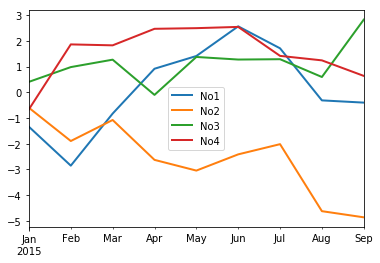

In [37]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

##### Series Class

In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
df['No1']

2015-01-31   -1.341278
2015-02-28   -1.509289
2015-03-31    2.022659
2015-04-30    1.741767
2015-05-31    0.494326
2015-06-30    1.152442
2015-07-31   -0.853357
2015-08-31   -2.022544
2015-09-30   -0.086844
Freq: M, Name: No1, dtype: float64

In [40]:
type(df['No1'])

pandas.core.series.Series

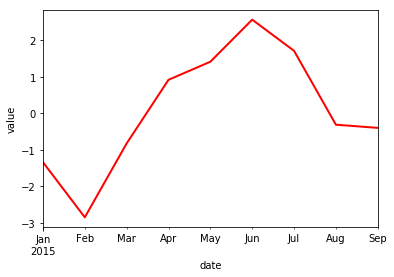

In [41]:
df['No1'].cumsum().plot(style='r', lw = 2.)
plt.xlabel('date')
plt.ylabel('value')

##### GroupBy Operations

In [42]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-1.341278,-0.603442,0.404988,-0.659941,Q1
2015-02-28,-1.509289,-1.290477,0.572644,2.519233,Q1
2015-03-31,2.022659,0.816838,0.288675,-0.036674,Q1
2015-04-30,1.741767,-1.549009,-1.368227,0.642412,Q2
2015-05-31,0.494326,-0.416375,1.473334,0.025078,Q2
2015-06-30,1.152442,0.629956,-0.100599,0.048611,Q2
2015-07-31,-0.853357,0.396526,0.013157,-1.125393,Q3
2015-08-31,-2.022544,-2.603055,-0.690904,-0.174313,Q3
2015-09-30,-0.086844,-0.238624,2.227769,-0.602966,Q3


In [44]:
# Grouping by "Quater"
groups = df.groupby('Quarter')

In [45]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.275969,-0.359027,0.422102,0.607540
Q2,1.129511,-0.445143,0.001503,0.238700
Q3,-0.987582,-0.815051,0.516674,-0.634224


In [46]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,2.022659,0.816838,0.572644,2.519233
Q2,1.741767,0.629956,1.473334,0.642412
Q3,-0.086844,0.396526,2.227769,-0.174313


In [47]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [49]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', "Even", 'Odd', 'Even', 'Odd', 'Even', 'Odd']

In [51]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [52]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [53]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.509289 -1.290477  0.572644  2.519233
        Odd       0.340691  0.106698  0.346832 -0.348307
Q2      Even      1.447104 -0.459527 -0.734413  0.345511
        Odd       0.494326 -0.416375  1.473334  0.025078
Q3      Even     -2.022544 -2.603055 -0.690904 -0.174313
        Odd      -0.470100  0.078951  1.120463 -0.864179